## 2. Clustering (Crime_data)
Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## 1. Import Libs

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

## 2. Import DataSet

In [2]:
from google.colab import files
upload = files.upload()


Saving crime_data.csv to crime_data.csv


In [3]:
crime_data = pd.read_csv("crime_data.csv")
crime_data_1 = crime_data.copy()
crime_data_1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 3. EDA

In [4]:
crime_data_1.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data_1.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

## Droping Unnamed: 0 column

In [6]:
crime_data_1.drop(['Unnamed: 0'],axis= 1, inplace=True)
crime_data_1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## 4. Preprocessing the Data || Normalizing Data

In [7]:
crime_data_norm = preprocessing.scale(crime_data_1)
crime_data_norm = pd.DataFrame(crime_data_norm)
crime_data_norm

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## 5. Clustering
## 5.1 Hirarchical Clustering
## 5.1.1 Create Dendogram

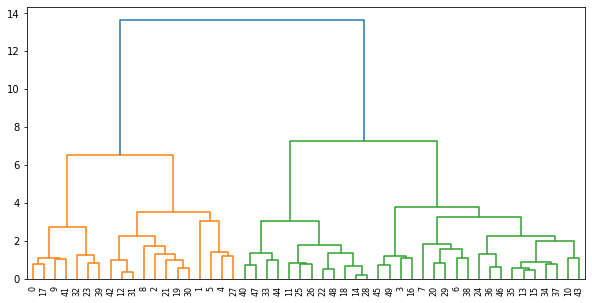

In [8]:
plt.figure(figsize=(10, 5)) 
dendgram = sch.dendrogram(sch.linkage(crime_data_norm,method='ward'))

## 5.1.2 Create Cluster

In [9]:
h_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
h_cluster

AgglomerativeClustering(n_clusters=3)

In [10]:
AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(n_clusters=3)

In [11]:
y=pd.DataFrame(h_cluster.fit_predict(crime_data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    19
1    19
2    12
Name: clustersid, dtype: int64

In [12]:
h_cluster.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

## 5.1.3 Adding clusters to dataset

In [13]:
crime_data_1['clustersid']=h_cluster.labels_
crime_data_1

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


## 5.1.4 Grouping

In [14]:
crime_data_1.groupby('clustersid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clustersid,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


## 5.1.5 Plot Clusters

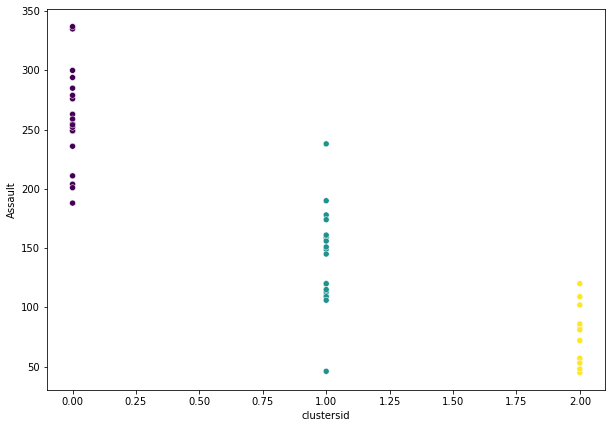

In [15]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_1['clustersid'],crime_data_1['Assault'], c=h_cluster.labels_)

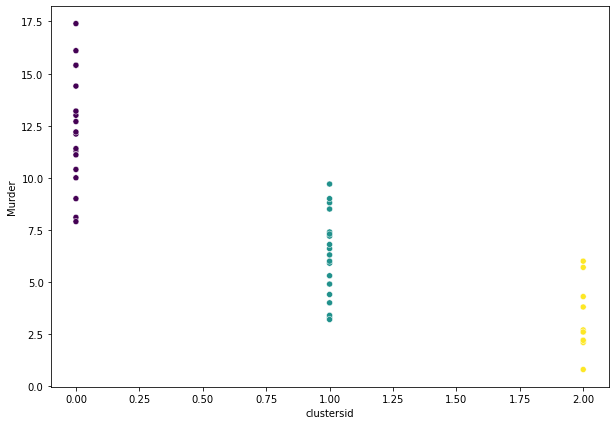

In [16]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_1['clustersid'],crime_data_1['Murder'], c=h_cluster.labels_)

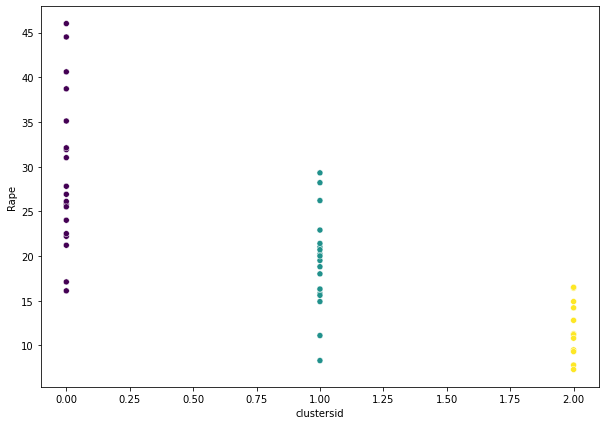

In [17]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_1['clustersid'],crime_data_1['Rape'], c=h_cluster.labels_)

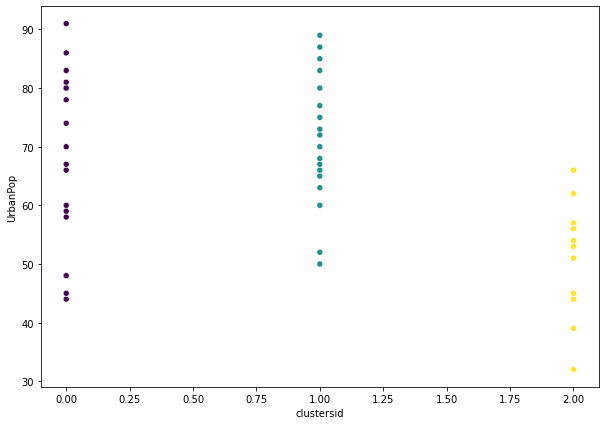

In [18]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_1['clustersid'],crime_data_1['UrbanPop'], c=h_cluster.labels_)

## 5.1.6 Data Filtering

In [19]:
crime_data_1[crime_data_1["clustersid"] == 0]

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
12,10.4,249,83,24.0,0
17,15.4,249,66,22.2,0
19,11.3,300,67,27.8,0


In [20]:
crime_data_1[crime_data_1["clustersid"] == 1]

,Murder,Assault,UrbanPop,Rape,clustersid
3,8.8,190,50,19.5,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
13,7.2,113,65,21.0,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
20,4.4,149,85,16.3,1
24,9.0,178,70,28.2,1
29,7.4,159,89,18.8,1


In [21]:
crime_data_1[crime_data_1["clustersid"] == 2]

,Murder,Assault,UrbanPop,Rape,clustersid
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
18,2.1,83,51,7.8,2
22,2.7,72,66,14.9,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2
44,2.2,48,32,11.2,2


## 5.2 K-Means Clustering
## 5.2.1 Use Elbow Graph to find optimum number of clusters (K value) from K values range

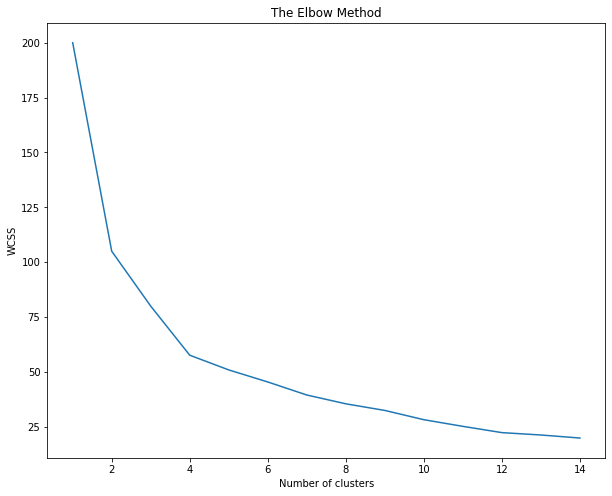

In [22]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(crime_data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 5.2.2 Create Cluster

In [23]:
km_clusters=KMeans(3,random_state=20).fit(crime_data_norm)
km_clusters

KMeans(n_clusters=3, random_state=20)

In [24]:
KMeans(n_clusters=3, random_state=20)

KMeans(n_clusters=3, random_state=20)

In [25]:
km_clusters.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

## 5.2.3 Adding clusters to dataset

In [26]:
crime_data_2=crime_data.drop(['Unnamed: 0'],axis=1)
crime_data_2['clusters_id_2']=km_clusters.labels_
crime_data_2

,Murder,Assault,UrbanPop,Rape,clusters_id_2
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


## 5.2.4 Compute Centroid

In [27]:
km_clusters.cluster_centers_

array([[-0.88515915, -1.0213324 , -0.94990286, -0.92016524],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

## 5.2.5 Grouping

In [28]:
crime_data_2.groupby('clusters_id_2').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_id_2,,,,
0,3.971429,86.500,51.928571,12.70000
1,12.165000,255.250,68.400000,29.16500
2,5.656250,138.875,73.875000,18.78125


## 5.2.6 Plot Clusters

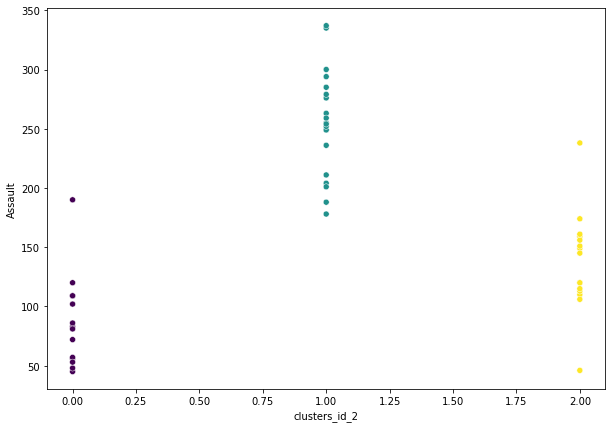

In [29]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_2['clusters_id_2'],crime_data_2['Assault'], c=km_clusters.labels_)

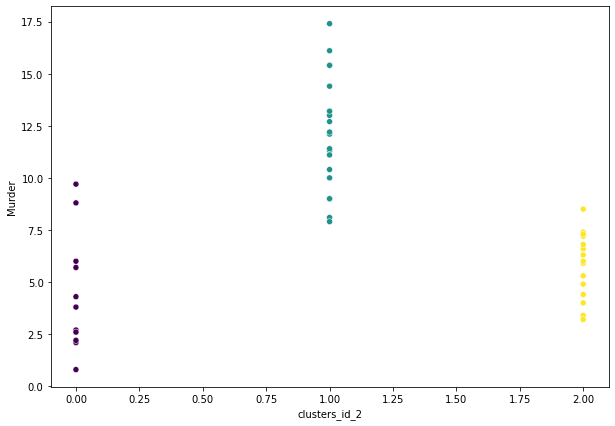

In [30]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_2['clusters_id_2'],crime_data_2['Murder'], c=km_clusters.labels_)

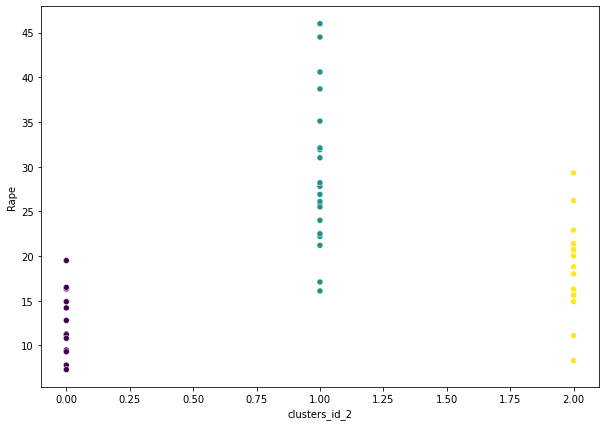

In [31]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_2['clusters_id_2'],crime_data_2['Rape'], c=km_clusters.labels_)

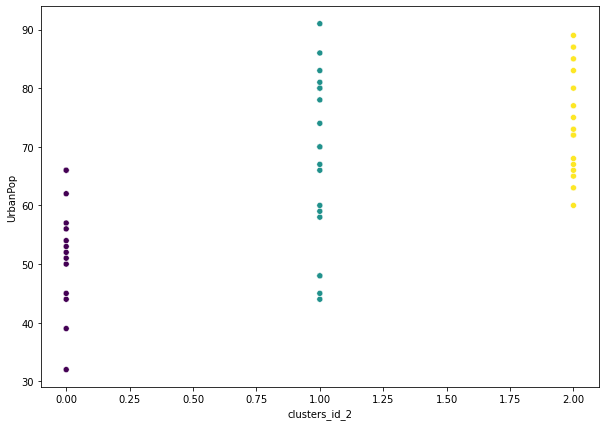

In [32]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_2['clusters_id_2'],crime_data_2['UrbanPop'], c=km_clusters.labels_)

## 5.1.6 Data Filtering

In [33]:
crime_data_2[crime_data_2["clusters_id_2"] == 0]

,Murder,Assault,UrbanPop,Rape,clusters_id_2
3,8.8,190,50,19.5,0
11,2.6,120,54,14.2,0
14,2.2,56,57,11.3,0
16,9.7,109,52,16.3,0
18,2.1,83,51,7.8,0
22,2.7,72,66,14.9,0
25,6.0,109,53,16.4,0
26,4.3,102,62,16.5,0
28,2.1,57,56,9.5,0
33,0.8,45,44,7.3,0


In [34]:
crime_data_2[crime_data_2["clusters_id_2"] == 1]

,Murder,Assault,UrbanPop,Rape,clusters_id_2
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1
12,10.4,249,83,24.0,1
17,15.4,249,66,22.2,1
19,11.3,300,67,27.8,1


In [35]:
crime_data_2[crime_data_2["clusters_id_2"] == 2]

,Murder,Assault,UrbanPop,Rape,clusters_id_2
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
10,5.3,46,83,20.2,2
13,7.2,113,65,21.0,2
15,6.0,115,66,18.0,2
20,4.4,149,85,16.3,2
29,7.4,159,89,18.8,2
34,7.3,120,75,21.4,2
35,6.6,151,68,20.0,2
36,4.9,159,67,29.3,2


## 5.3 DBSCAN Clustering
## 5.3.1 Create DBSCAN Clustering

In [36]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_data_norm)

DBSCAN(eps=1, min_samples=4)

In [37]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

## 5.3.2 Adding clusters to dataset

In [38]:
crime_data_3=crime_data.drop(['Unnamed: 0'],axis=1)
crime_data_3['db_clusters']=dbscan.labels_
crime_data_3

,Murder,Assault,UrbanPop,Rape,db_clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


## 5.3.3 Grouping

In [39]:
crime_data_3.groupby('db_clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
db_clusters,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


## 5.3.4 Plot Clusters

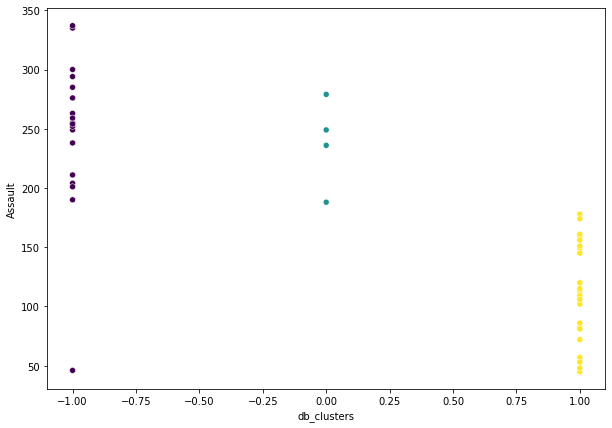

In [40]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_3['db_clusters'],crime_data_3['Assault'], c=dbscan.labels_)

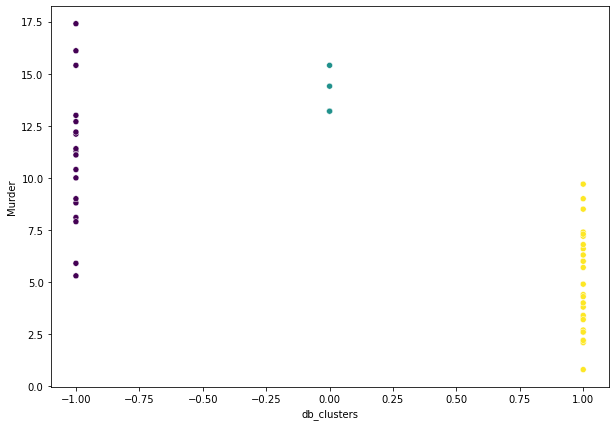

In [41]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_3['db_clusters'],crime_data_3['Murder'], c=dbscan.labels_)

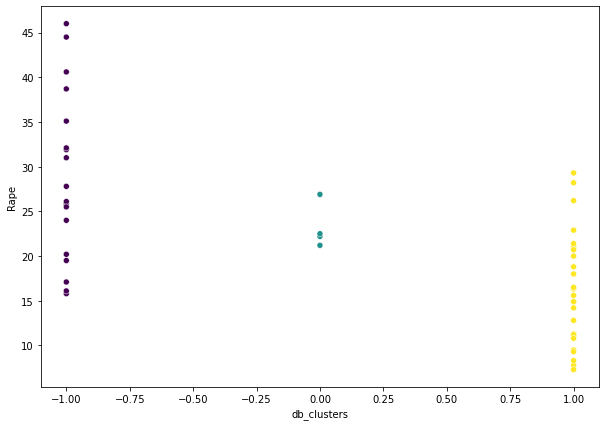

In [42]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_3['db_clusters'],crime_data_3['Rape'], c=dbscan.labels_)

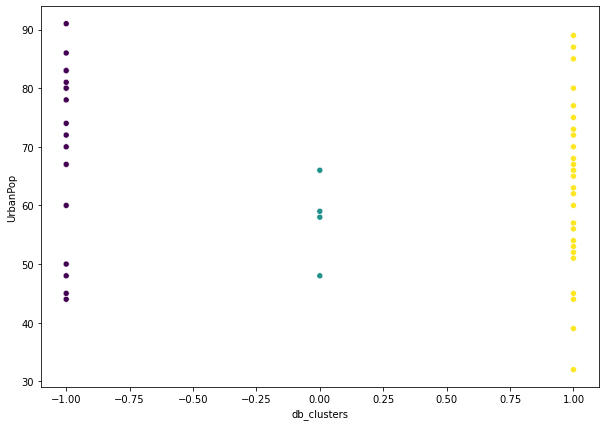

In [43]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(crime_data_3['db_clusters'],crime_data_3['UrbanPop'], c=dbscan.labels_)

## 5.3.5 Data Filtering

In [44]:
crime_data_3[crime_data_3['db_clusters'] == -1]


,Murder,Assault,UrbanPop,Rape,db_clusters
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
10,5.3,46,83,20.2,-1
12,10.4,249,83,24.0,-1


In [45]:
crime_data_3[crime_data_3['db_clusters'] == 0]

,Murder,Assault,UrbanPop,Rape,db_clusters
0,13.2,236,58,21.2,0
17,15.4,249,66,22.2,0
39,14.4,279,48,22.5,0
41,13.2,188,59,26.9,0


In [46]:
crime_data_3[crime_data_3['db_clusters'] == 1]

,Murder,Assault,UrbanPop,Rape,db_clusters
6,3.3,110,77,11.1,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
20,4.4,149,85,16.3,1
22,2.7,72,66,14.9,1
24,9.0,178,70,28.2,1


## END